In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import numpy as np

# Generator network: simple linear transformation
def generator(z, weights_g):
    return np.dot(z, weights_g)

# Discriminator network: simple linear transformation
def discriminator(x, weights_d):
    return np.dot(x, weights_d)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hyperparameters
epochs = 10000
learning_rate = 0.01
batch_size = 32
latent_dim = 100
data_dim = 2
num_examples = 1000
eps = 1e-8  # For numerical stability in log

# Generate sample real data: 2D points along y = -x
real_data = np.random.normal(loc=0, scale=1.0, size=(num_examples, data_dim))
real_data[:, 1] = -real_data[:, 0]

# Initialize weights
weights_g = np.random.normal(size=(latent_dim, data_dim))   # (100, 2)
weights_d = np.random.normal(size=(data_dim, 1))            # (2, 1)

for epoch in range(epochs):

    # Sample real data
    idx = np.random.randint(0, num_examples, batch_size)
    real_batch = real_data[idx]                              # (32, 2)

    # Generate fake data
    z = np.random.normal(size=(batch_size, latent_dim))      # (32, 100)
    fake_data = generator(z, weights_g)                      # (32, 2)
    if(epoch % 1000 == 0):
        print("z shape: ", z.shape)
        print("weights_g shape: ", weights_g.shape)
        print("real_batch shape: ", real_batch.shape)

    # Discriminator outputs
    d_real = discriminator(real_batch, weights_d)            # (32, 1)
    d_fake = discriminator(fake_data, weights_d)             # (32, 1)

    # Apply sigmoid
    sig_d_real = sigmoid(d_real)
    sig_d_fake = sigmoid(d_fake)

    # Discriminator loss (with stability clipping)
    d_loss_real = -np.mean(np.log(np.clip(sig_d_real, eps, 1 - eps)))
    d_loss_fake = -np.mean(np.log(np.clip(1 - sig_d_fake, eps, 1 - eps)))
    d_loss = d_loss_real + d_loss_fake

    # Gradients for discriminator
    grad_real = np.dot(real_batch.T, (sig_d_real - 1)) / batch_size    # (2, 32) @ (32, 1) → (2, 1)
    grad_fake = np.dot(fake_data.T, sig_d_fake) / batch_size
    d_weights_d = grad_real + grad_fake                                # (2, 1)
    weights_d -= learning_rate * d_weights_d                           # Update

    # Generator loss
    g_loss = -np.mean(np.log(np.clip(sig_d_fake, eps, 1 - eps)))

    # Gradients for generator (discriminator is linear so backprop is simple)
    g_grad = np.dot(z.T, sig_d_fake) / batch_size                      # (100, 32) @ (32, 1) → (100, 1)
    weights_g -= learning_rate * g_grad                                # Update

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss:.4f}, g_loss: {g_loss:.4f}")


z shape:  (32, 100)
weights_g shape:  (100, 2)
real_batch shape:  (32, 2)
Epoch [100/10000], d_loss: 1.3775, g_loss: 0.7141
Epoch [200/10000], d_loss: 1.3784, g_loss: 0.7322
Epoch [300/10000], d_loss: 1.4060, g_loss: 0.6866
Epoch [400/10000], d_loss: 1.3847, g_loss: 0.6959
Epoch [500/10000], d_loss: 1.3743, g_loss: 0.7070
Epoch [600/10000], d_loss: 1.4056, g_loss: 0.6819
Epoch [700/10000], d_loss: 1.3865, g_loss: 0.6945
Epoch [800/10000], d_loss: 1.3796, g_loss: 0.7065
Epoch [900/10000], d_loss: 1.3840, g_loss: 0.7065
Epoch [1000/10000], d_loss: 1.4105, g_loss: 0.6719
z shape:  (32, 100)
weights_g shape:  (100, 2)
real_batch shape:  (32, 2)
Epoch [1100/10000], d_loss: 1.3763, g_loss: 0.7062
Epoch [1200/10000], d_loss: 1.3819, g_loss: 0.6995
Epoch [1300/10000], d_loss: 1.3721, g_loss: 0.7195
Epoch [1400/10000], d_loss: 1.3841, g_loss: 0.7022
Epoch [1500/10000], d_loss: 1.4249, g_loss: 0.6739
Epoch [1600/10000], d_loss: 1.3822, g_loss: 0.7005
Epoch [1700/10000], d_loss: 1.3665, g_loss: 0

In [34]:
# After training, you can sample data from the generator
sampled_data = generator(np.random.normal(size=(1, latent_dim)), weights_g)
print("Sampled Data:", sampled_data)

Sampled Data: [[-4.47842811  4.4761989 ]]


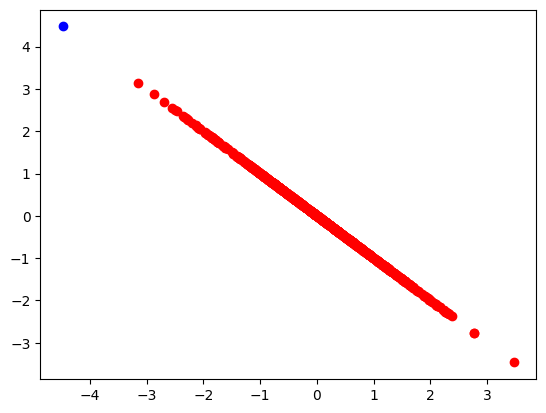

In [35]:
plt.plot(real_data[:, 0], real_data[:, 1], 'ro', label='Real Data')
plt.plot(sampled_data[:, 0], sampled_data[:, 1], 'bo', label='Fake Data')